To Develop a Python script using OpenCV to calculate and plot histograms of color channels (RGB) for an image of a natural picture to analyze color variations and intensities.

In [2]:
import cv2 as cv
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import matplotlib.pylab as plt
import imutils

(627, 1200, 3)


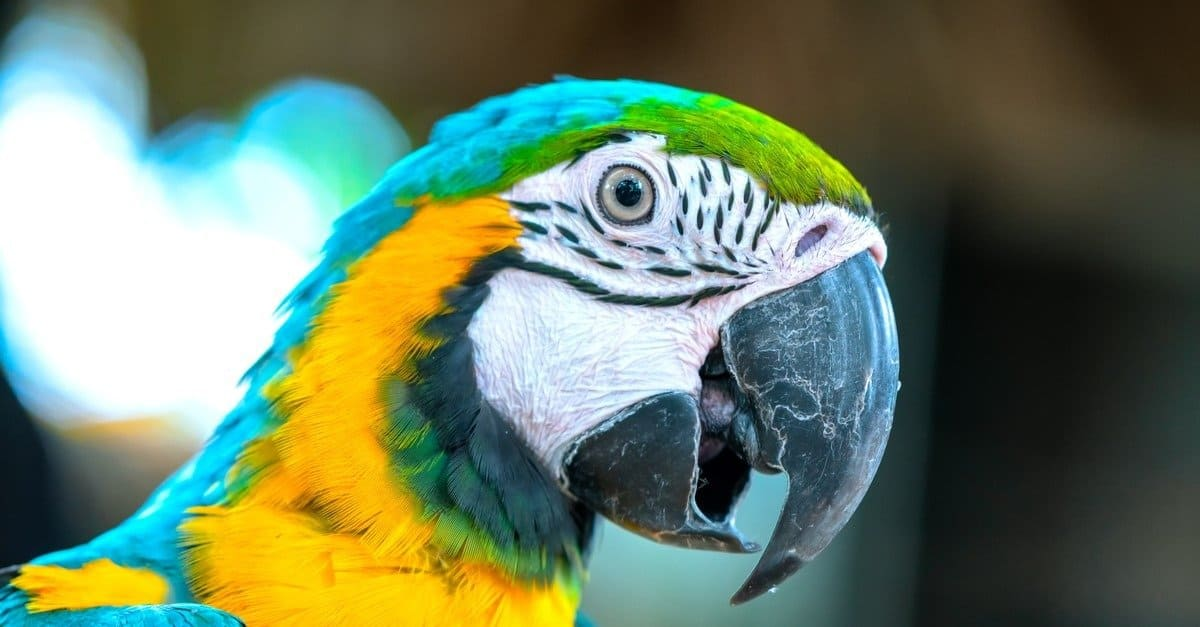

In [3]:
img = cv.imread('/content/download.png')
print(img.shape)

grey = np.full(img.shape,128,dtype='uint8')
cv2_imshow(img)


In [5]:
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)

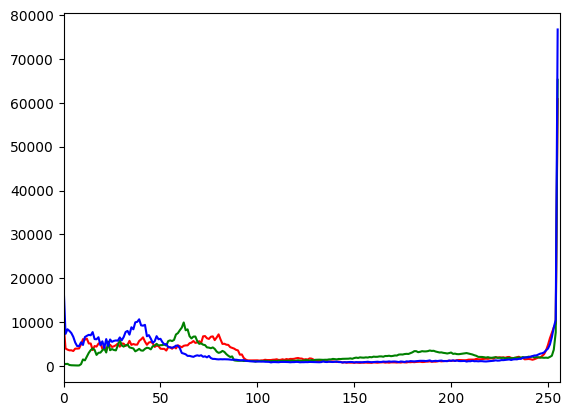

In [7]:
# Calculate histograms for each channel
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    histogram = cv.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.xlim([0, 256])

In [9]:
# Function to plot histograms
def plt_hist(image, title, ax, color):
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 255))
    ax.plot(bin_edges[0:-1], histogram, color=color)
    ax.set_xlim(0, 255)
    ax.set_title(title)
    ax.set_xlabel('Intensity of pixel')
    ax.set_ylabel('freq')

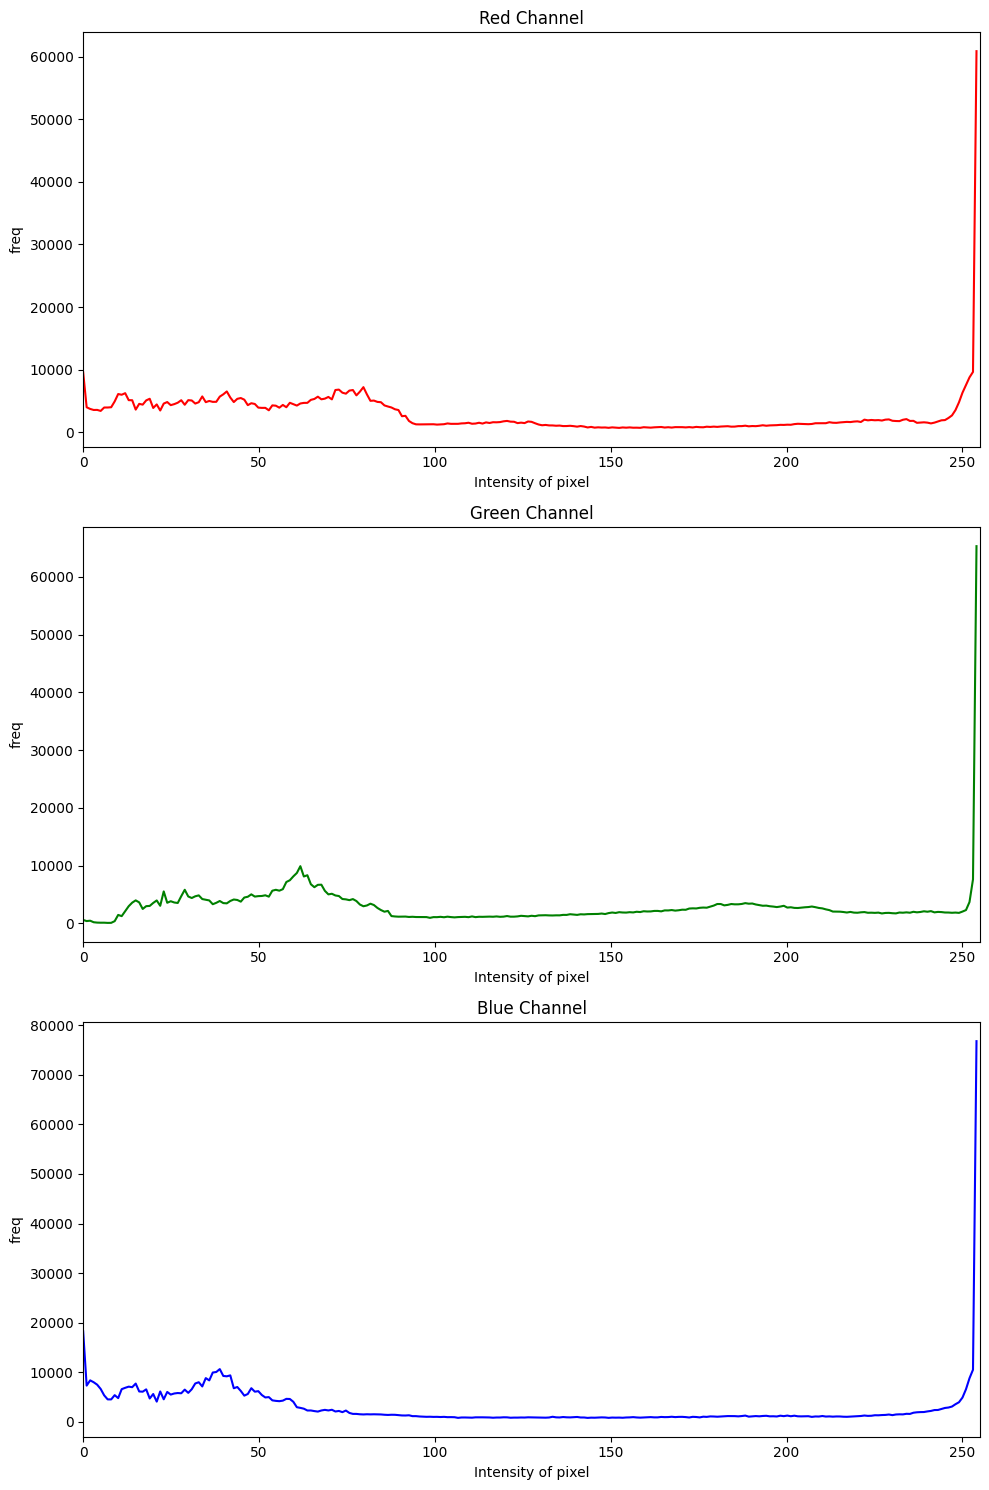

In [10]:
# Plot histograms for each color channel
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
colors = ('r', 'g', 'b')
titles = ('Red Channel', 'Green Channel', 'Blue Channel')

for i, (color, title) in enumerate(zip(colors, titles)):
    plt_hist(image[:, :, i], title, axs[i], color)

plt.tight_layout()
plt.show()

In [11]:
# Compute and print mean and standard deviation for each channel
for i, color in enumerate(('Red', 'Green', 'Blue')):
    mean_val = np.mean(image[:, :, i])
    std_val = np.std(image[:, :, i])
    print(f'{color} Channel - Mean: {mean_val:.2f}, Standard Deviation: {std_val:.2f}')

Red Channel - Mean: 108.26, Standard Deviation: 86.11
Green Channel - Mean: 126.81, Standard Deviation: 81.13
Blue Channel - Mean: 102.32, Standard Deviation: 92.95
